# Nutri-Score Dataset Analysis

This notebook explores and preprocesses the Nutri-Score dataset, focusing on nutritional composition metrics for foods (specifically, columns ending in '_100g'). The goal is to prepare the data for modeling, following steps of loading, cleaning, advanced EDA, and preprocessing.

## Data Loading and Initial Inspection

In this section, we load the dataset and display initial details, such as the first few rows and column names. This helps confirm the data structure and identify potential preprocessing needs.

In [2]:
# Importing necessary libraries
import pandas as pd

def load_selected_features(file_path):
    """
    Loads the selected features from a CSV file.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the selected features.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}.")
        return df
    except FileNotFoundError:
        print(f"File not found at {file_path}. Please check the path.")
        raise
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        raise

# Define the file path and load the dataset
file_path = 'C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/selected_features.csv'  # Replace with the actual file path
df = load_selected_features(file_path)

# Display the first few rows and columns of the dataset
print('First five rows of the dataset:')
display(df.head())

print('Columns in the dataset:')
display(df.columns.tolist())


Dataset loaded successfully from C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/selected_features.csv.
First five rows of the dataset:


nutriscore_grade  nutriscore_score  nutrition-score-fr_100g  nova_group  \
0                d              12.0                     12.0         4.0   
1                e              19.0                     19.0         3.0   
2                a              -2.0                     -2.0         3.0   
3                e              17.0                     17.0         4.0   
4                d              15.0                     15.0         NaN   

   ecoscore_score  energy-kcal_100g   fat_100g  saturated-fat_100g  \
0             NaN          406.0000   6.600000            4.300000   
1            40.0          578.0000  40.900000           21.500000   
2             NaN          208.0000   0.000000            0.000000   
3            50.0           85.0000   2.400000            1.100000   
4             NaN          536.0715  35.714284            8.928572   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0             6.70000      6.70000         NaN      80.000000   0.500000   
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
0     0.200000                                           0.013317       
1     0.000000                                          12.000000       
2     0.092000                                          50.000000       
3     0.472441                                           0.000000       
4     0.035714                                                NaN       

           pnns_groups_1                     pnns_groups_2  \
0                    NaN                               NaN   
1          Sugary snacks                Chocolate products   
2  Fruits and vegetables                        Vegetables   
3              Beverages  Artificially sweetened beverages   
4                    NaN                               NaN   

                           food_groups          main_category  
0                                  NaN     en:protein-powders  
1                en:chocolate-products  en:dark-chocolate-bar  
2                        en:vegetables          en:vegetables  
3  en:artificially-sweetened-beverages            en:can-food  
4                                  NaN     en:protein-powders

Columns in the dataset:


['nutriscore_grade',
 'nutriscore_score',
 'nutrition-score-fr_100g',
 'nova_group',
 'ecoscore_score',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'main_category']

## Data Filtering: Extracting '_100g' Columns

Here, we filter for columns ending in '_100g' to focus on nutritional metrics per 100 grams. We will also display summary statistics to inspect the distributions and check for potential preprocessing needs.

In [23]:
# Step 1: Extract all columns ending with '_100g'
columns_100g = [col for col in df.columns if '_100g' in col]

# Step 2: Create a DataFrame with only those columns
df_100g = df[columns_100g]

# Step 3: Display the first few rows and summary statistics of the _100g columns
print('First 5 rows of the _100g columns:')
display(df_100g.head())

print('Summary statistics of _100g columns:')
display(df_100g.describe())

First 5 rows of the _100g columns:


nutrition-score-fr_100g  energy-kcal_100g   fat_100g  saturated-fat_100g  \
0                     12.0          406.0000   6.600000            4.300000   
1                     19.0          578.0000  40.900000           21.500000   
2                     -2.0          208.0000   0.000000            0.000000   
3                     17.0           85.0000   2.400000            1.100000   
4                     15.0          536.0715  35.714284            8.928572   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0             6.70000      6.70000         NaN      80.000000   0.500000   
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  
0     0.200000                                           0.013317      
1     0.000000                                          12.000000      
2     0.092000                                          50.000000      
3     0.472441                                           0.000000      
4     0.035714                                                NaN

Summary statistics of _100g columns:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            975588.000000      9.410490e+05  974725.000000   
mean                  8.825462      1.062644e+11      15.338968   
std                   8.815415      1.030846e+14     847.826653   
min                 -15.000000      0.000000e+00       0.000000   
25%                   1.000000      1.072000e+02       1.000000   
50%                   9.000000      2.620000e+02       7.500000   
75%                  15.000000      4.000000e+02      21.800000   
max                  40.000000      1.000000e+17  678454.000000   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       952860.000000       974271.000000  967699.000000  541103.000000   
mean             5.666297           28.262762      13.318401       3.116900   
std            386.899096           28.834181     282.465849      16.226943   
min              0.000000            0.000000      -1.000000      -1.000000   
25%              0.100000            4.000000       0.800000       0.000000   
50%              2.000000           16.000000       3.730000       1.700000   
75%              7.300000           53.000000      18.000000       3.800000   
max         377372.000000         4903.000000  277223.000000    9888.000000   

       proteins_100g     salt_100g   sodium_100g  \
count  974713.000000  9.752320e+05  9.752320e+05   
mean        8.530886  8.203177e+07  3.281271e+07   
std        79.615490  8.100951e+10  3.240380e+10   
min        -8.330000  0.000000e+00  0.000000e+00   
25%         1.600000  8.000000e-02  3.200000e-02   
50%         6.000000  5.350000e-01  2.140000e-01   
75%        12.000000  1.300000e+00  5.200000e-01   
max     77667.000000  8.000000e+13  3.200000e+13   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      644259.000000      
mean                                           19.136077      
std                                            35.913999      
min                                           -65.887256      
25%                                             0.000000      
50%                                             0.705937      
75%                                            23.698291      
max                                         13461.000000

## Exploratory Data Analysis (EDA)

In this section, we will visualize missing values and explore the distributions of the '_100g' columns. These insights will guide our preprocessing decisions.

##### EDA Step 1: Data Cleaning - Filter Out Unreasonable Values in "_100g" Columns

In [21]:


# Define columns that should not logically exceed 100 grams per 100 grams of product
limit_columns = [
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'proteins_100g', 
    'fiber_100g', 
    'salt_100g', 
    'sodium_100g'
]

# Apply filtering for logical limits on nutrient columns (<= 100g) and energy (<= 900 kcal)
df_filtered = df[
    (df[limit_columns] <= 100).all(axis=1) &  # Check that all values in limit_columns are <= 100
    (df['energy-kcal_100g'] <= 900)           # Check that energy is <= 900 kcal
]

# Display the resulting filtered DataFrame for verification
print("Filtered DataFrame with logical limits applied to '_100g' columns and energy:")
display(df_filtered.head())

# Optional: Display summary statistics of the filtered DataFrame for a quick overview
print("Summary statistics after filtering:")
display(df_filtered.describe())


Filtered DataFrame with logical limits applied to '_100g' columns and energy:


nutriscore_grade  nutriscore_score  nutrition-score-fr_100g  nova_group  \
1                e              19.0                     19.0         3.0   
2                a              -2.0                     -2.0         3.0   
3                e              17.0                     17.0         4.0   
4                d              15.0                     15.0         NaN   
5                d              13.0                     13.0         4.0   

   ecoscore_score  energy-kcal_100g   fat_100g  saturated-fat_100g  \
1            40.0          578.0000  40.900000           21.500000   
2             NaN          208.0000   0.000000            0.000000   
3            50.0           85.0000   2.400000            1.100000   
4             NaN          536.0715  35.714284            8.928572   
5            52.0          442.0000  22.000000            2.600000   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   
5            54.00000     25.00000    1.400000       6.400000   0.530000   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
1     0.000000                                          12.000000       
2     0.092000                                          50.000000       
3     0.472441                                           0.000000       
4     0.035714                                                NaN       
5     0.212000                                          22.666667       

           pnns_groups_1                     pnns_groups_2  \
1          Sugary snacks                Chocolate products   
2  Fruits and vegetables                        Vegetables   
3              Beverages  Artificially sweetened beverages   
4                    NaN                               NaN   
5          Sugary snacks                Biscuits and cakes   

                           food_groups          main_category  
1                en:chocolate-products  en:dark-chocolate-bar  
2                        en:vegetables          en:vegetables  
3  en:artificially-sweetened-beverages            en:can-food  
4                                  NaN     en:protein-powders  
5                en:biscuits-and-cakes    en:plain-madeleines

Summary statistics after filtering:


nutriscore_score  nutrition-score-fr_100g     nova_group  \
count     517130.000000            517130.000000  396629.000000   
mean           7.579583                 7.579583       3.357168   
std            8.975256                 8.975256       1.005501   
min          -15.000000               -15.000000       1.000000   
25%            0.000000                 0.000000       3.000000   
50%            7.000000                 7.000000       4.000000   
75%           15.000000                15.000000       4.000000   
max           40.000000                40.000000       4.000000   

       ecoscore_score  energy-kcal_100g       fat_100g  saturated-fat_100g  \
count   251707.000000     517130.000000  517130.000000       517130.000000   
mean        52.274170        281.554329      13.261304            4.597277   
std         23.833307        183.659863      16.411385            7.180809   
min        -30.000000          0.000000       0.000000            0.000000   
25%         34.000000        114.000000       1.100000            0.100000   
50%         53.000000        280.000000       7.140000            1.700000   
75%         72.000000        410.000000      20.590000            6.400000   
max        125.000000        900.000000     100.000000          100.000000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       517130.000000  517130.000000  517130.000000  517130.000000   
mean            32.151439      13.155525       3.086659       8.255812   
std             27.422183      18.189312       4.936511       9.050436   
min              0.000000       0.000000       0.000000      -8.330000   
25%              6.670000       1.100000       0.000000       2.100000   
50%             24.000000       4.200000       1.700000       6.200000   
75%             57.140000      20.000000       3.800000      11.000000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  \
count  517130.000000  517130.000000   
mean        1.049241       0.419696   
std         3.139926       1.255975   
min         0.000000       0.000000   
25%         0.082500       0.033000   
50%         0.552500       0.221000   
75%         1.200000       0.480000   
max       100.000000      40.000000   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      416243.000000      
mean                                           20.792469      
std                                            33.168015      
min                                            -4.053013      
25%                                             0.000000      
50%                                             1.500000      
75%                                            26.603235      
max                                          2315.000000

#### step 2 Comprehensive Overview 


##### Review  visualization for insights on distributions, relationships, and potential outliers.

<Figure size 1500x1000 with 0 Axes>

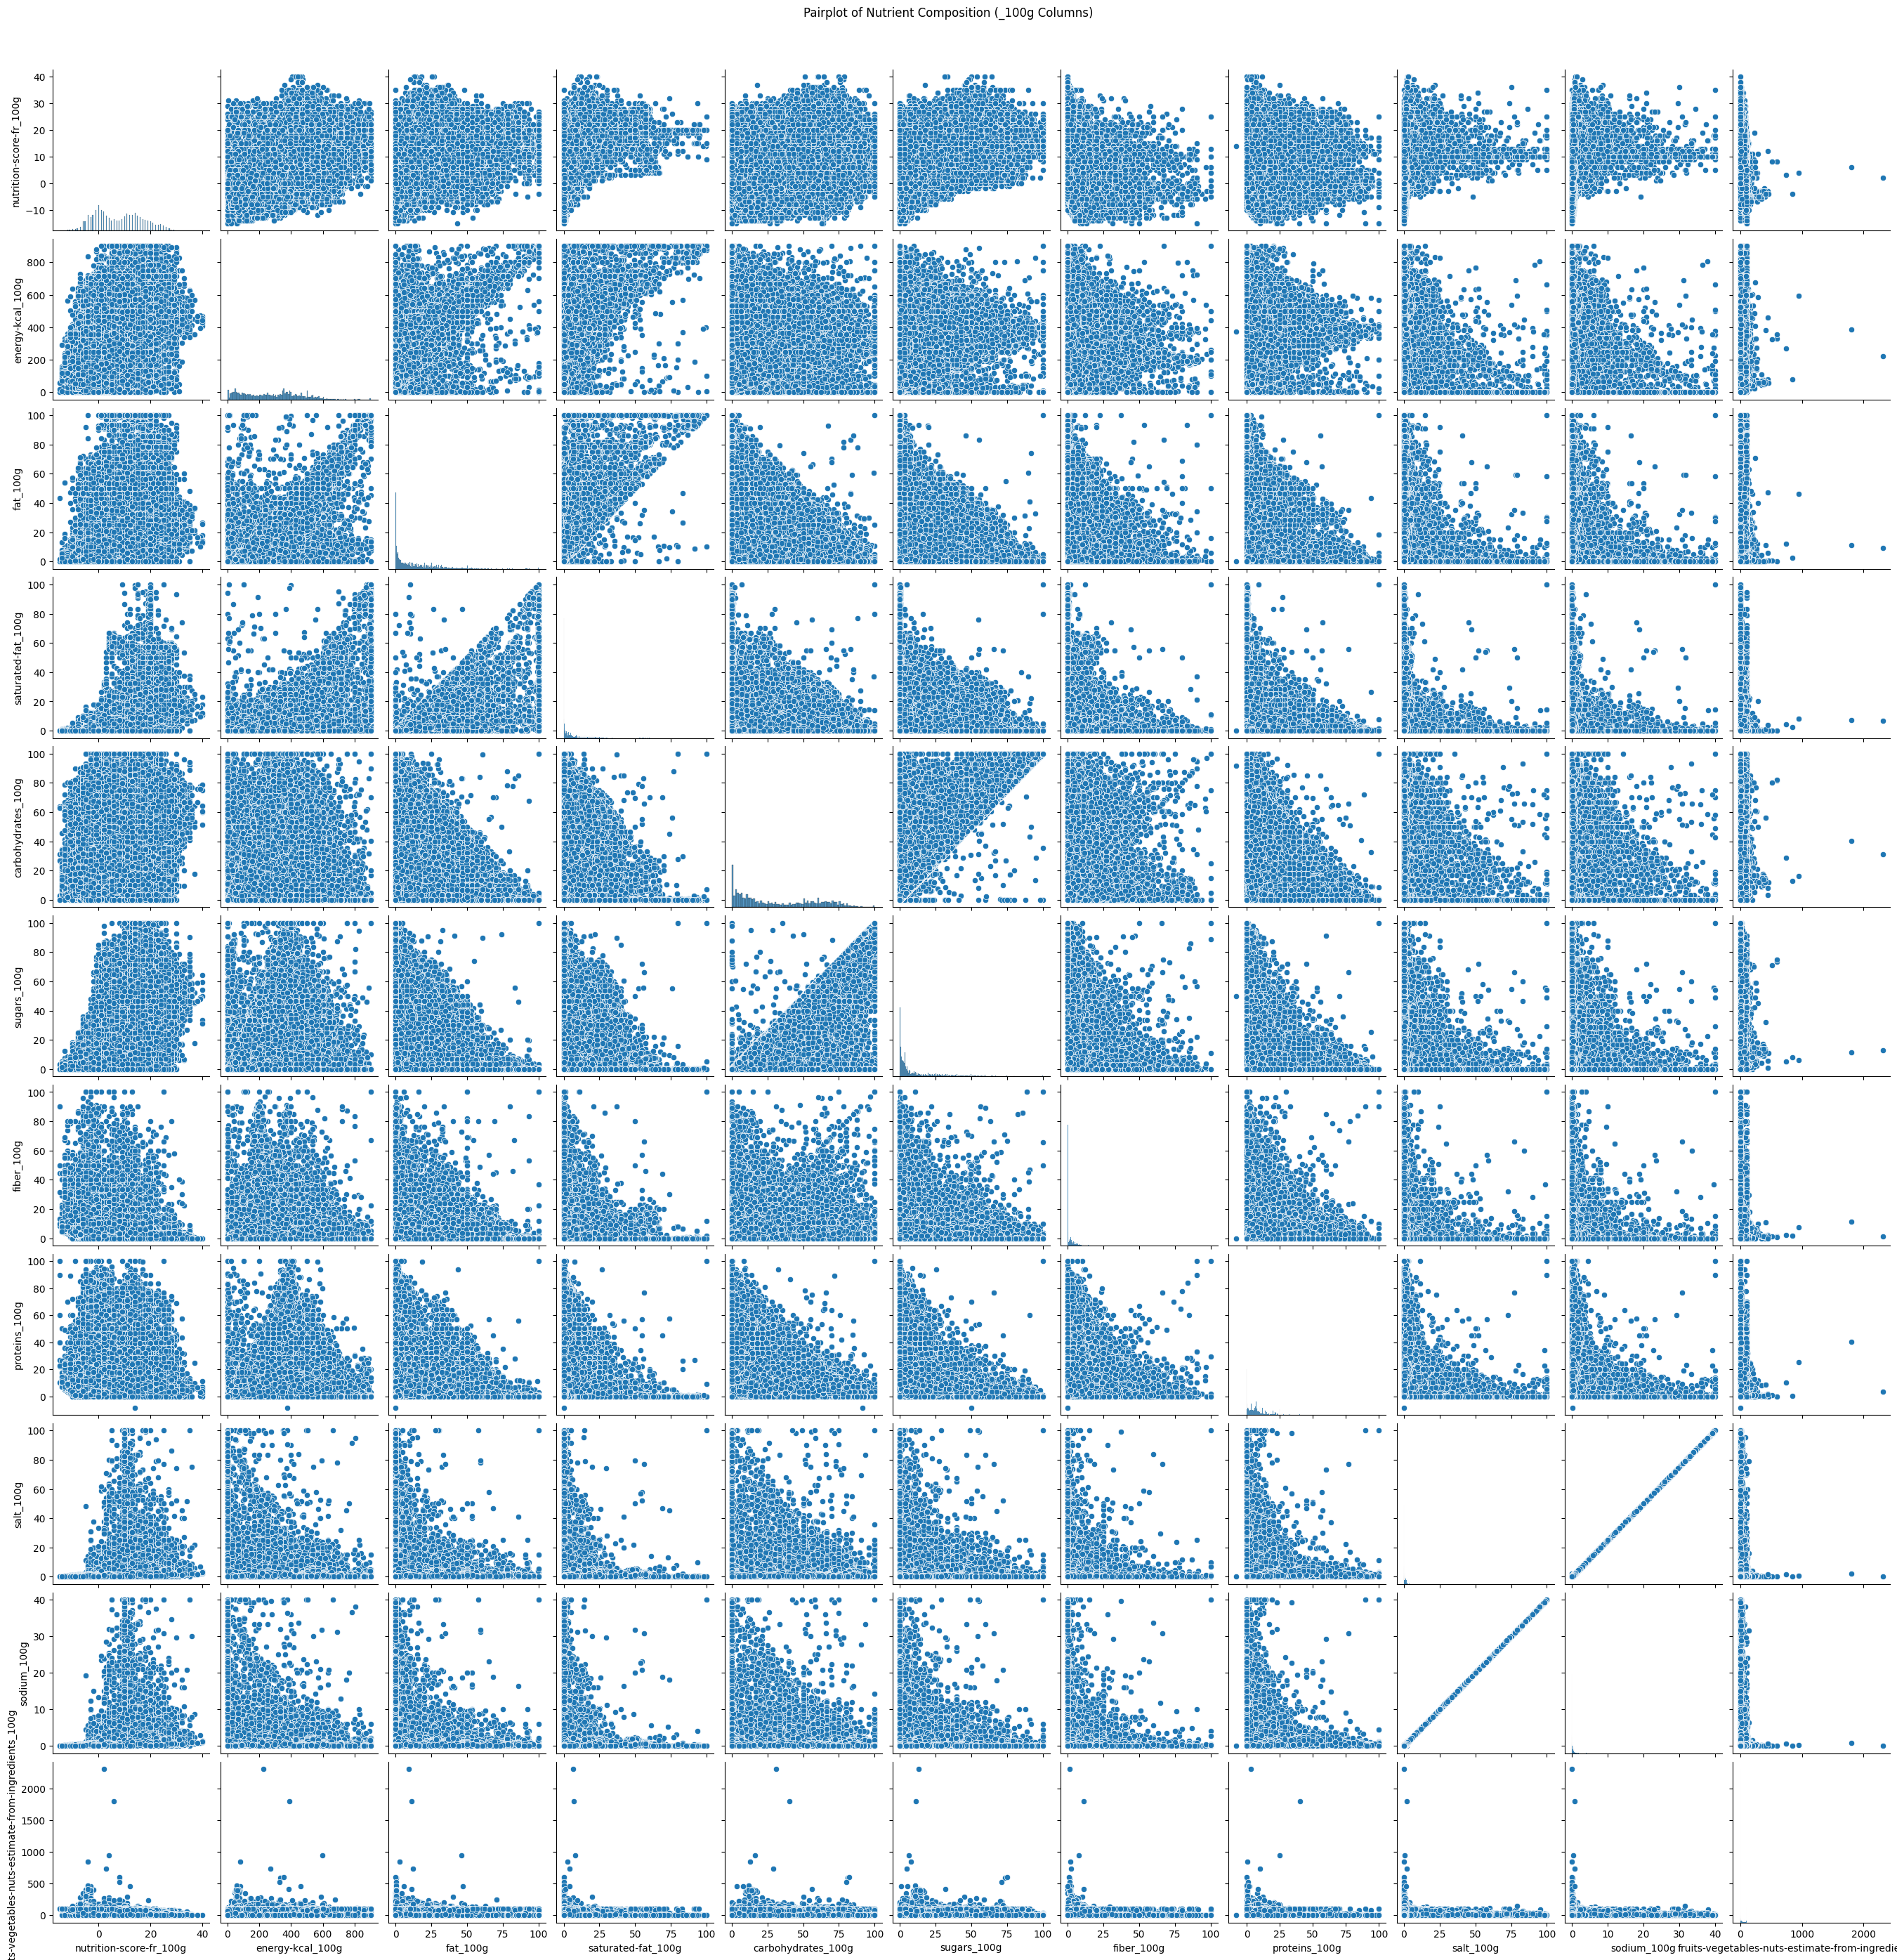

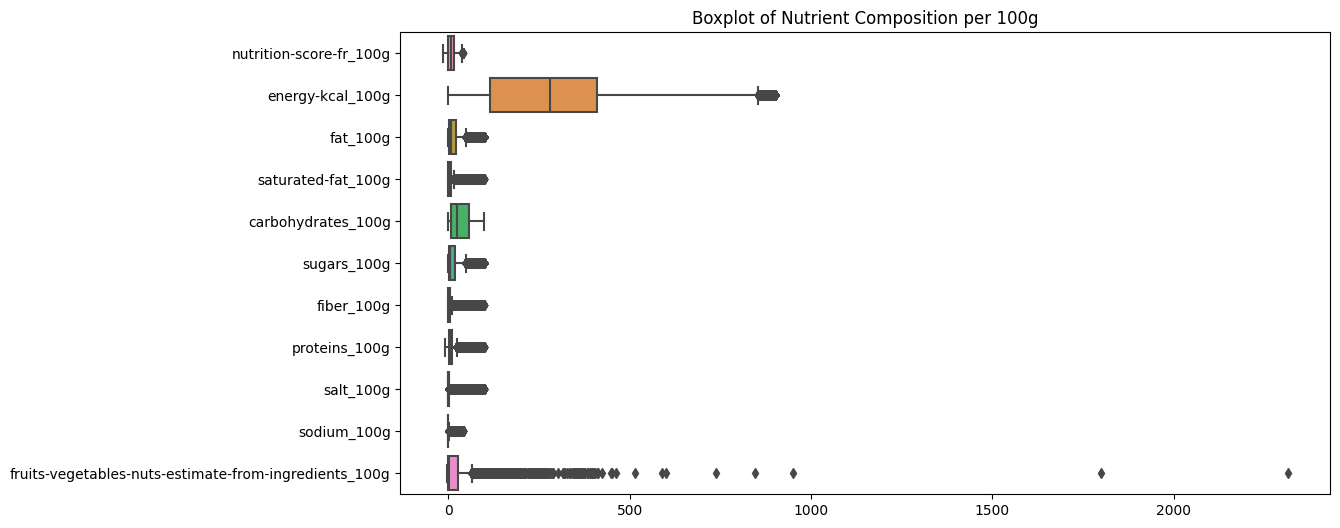

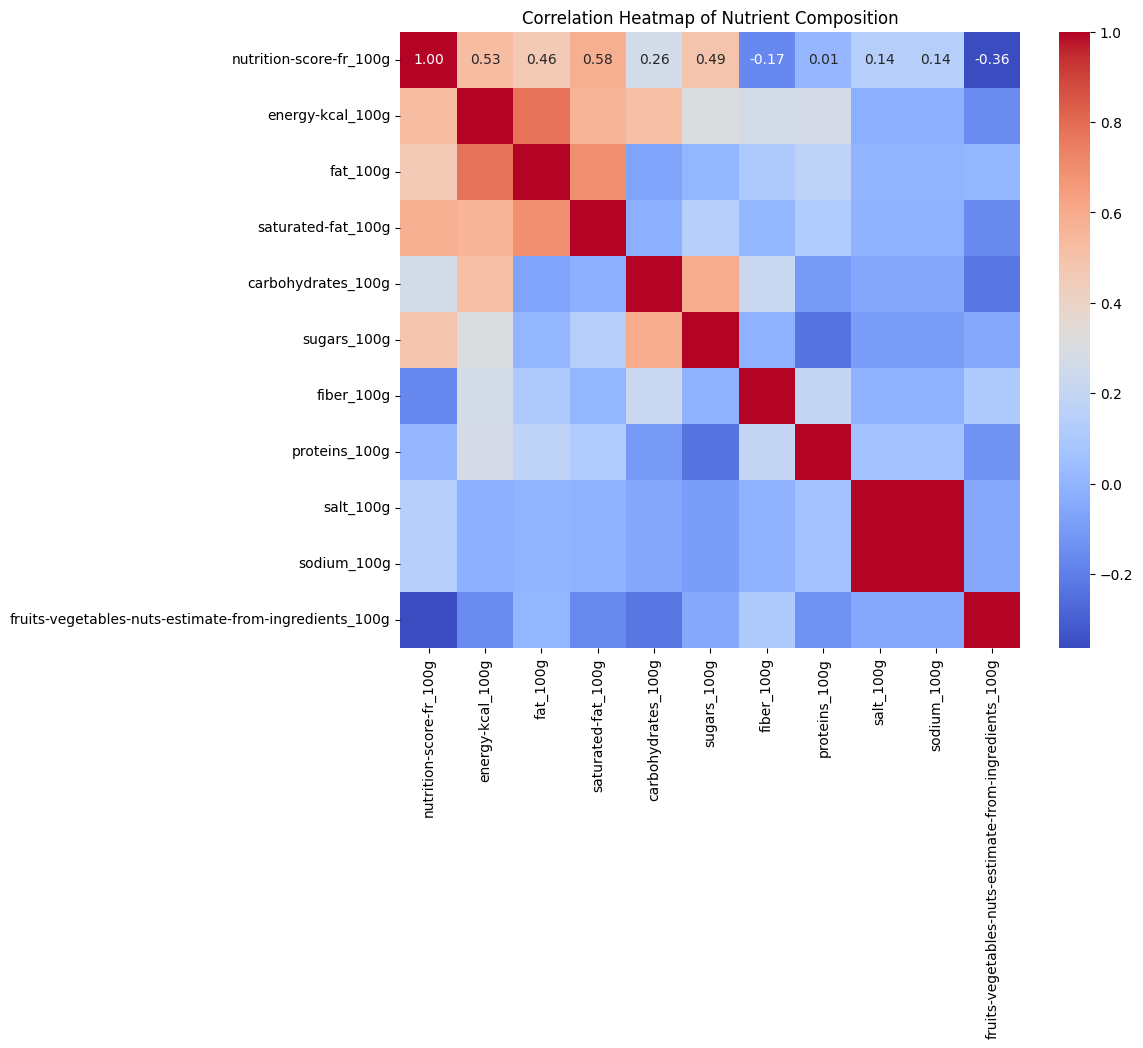

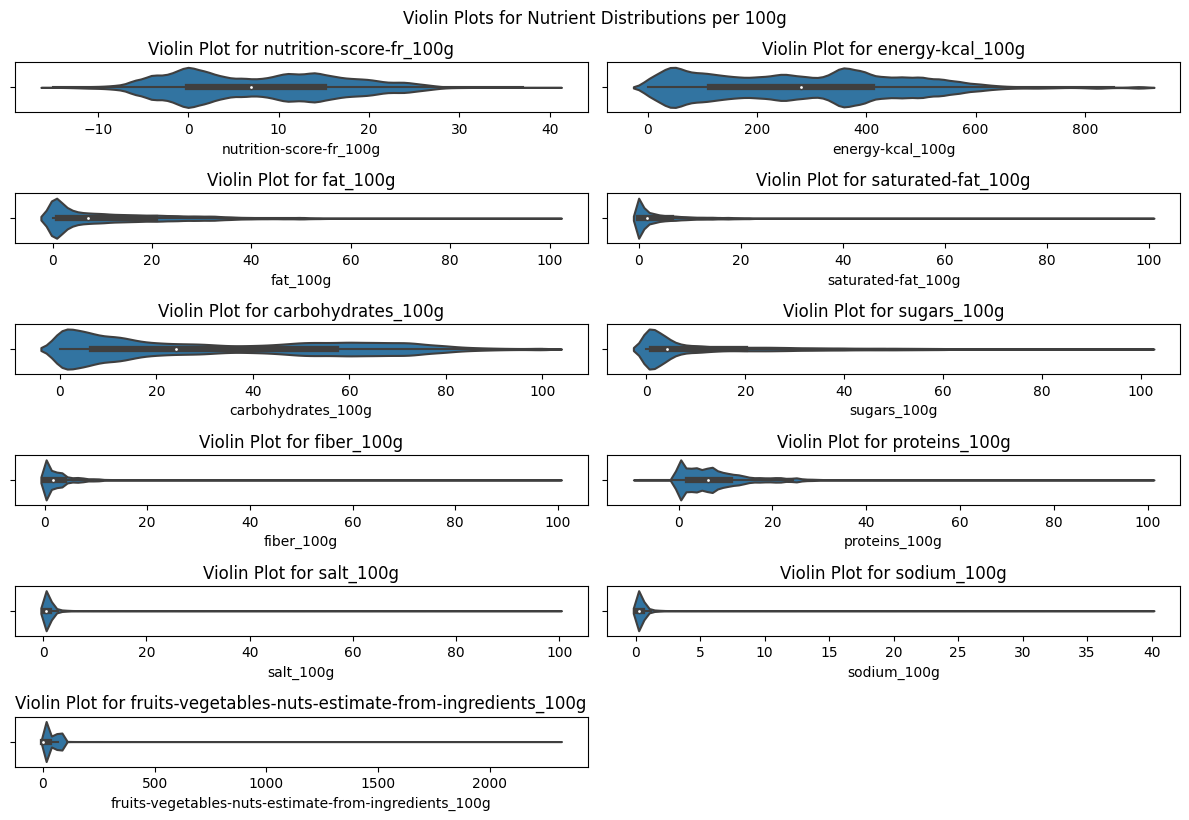

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overview of Nutrient Composition in '_100g' Columns

# 1. Pairplot: Visualize distributions and pairwise relationships
plt.figure(figsize=(15, 10))
sns.pairplot(df_filtered[columns_100g])
plt.suptitle("Pairplot of Nutrient Composition (_100g Columns)", y=1.02)
plt.show()

# 2. Boxplot: Examine spread and identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[columns_100g], orient="h")
plt.title("Boxplot of Nutrient Composition per 100g")
plt.show()

# 3. Correlation Heatmap: Visualize relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[columns_100g].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutrient Composition")
plt.show()

# 4. Violin Plots: Observe distributions and density for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_100g, 1):
    plt.subplot(len(columns_100g) // 2 + 1, 2, i)
    sns.violinplot(x=df_filtered[col])
    plt.title(f"Violin Plot for {col}")
plt.tight_layout()
plt.suptitle("Violin Plots for Nutrient Distributions per 100g", y=1.02)
plt.show()


#### Missing Values Overview:

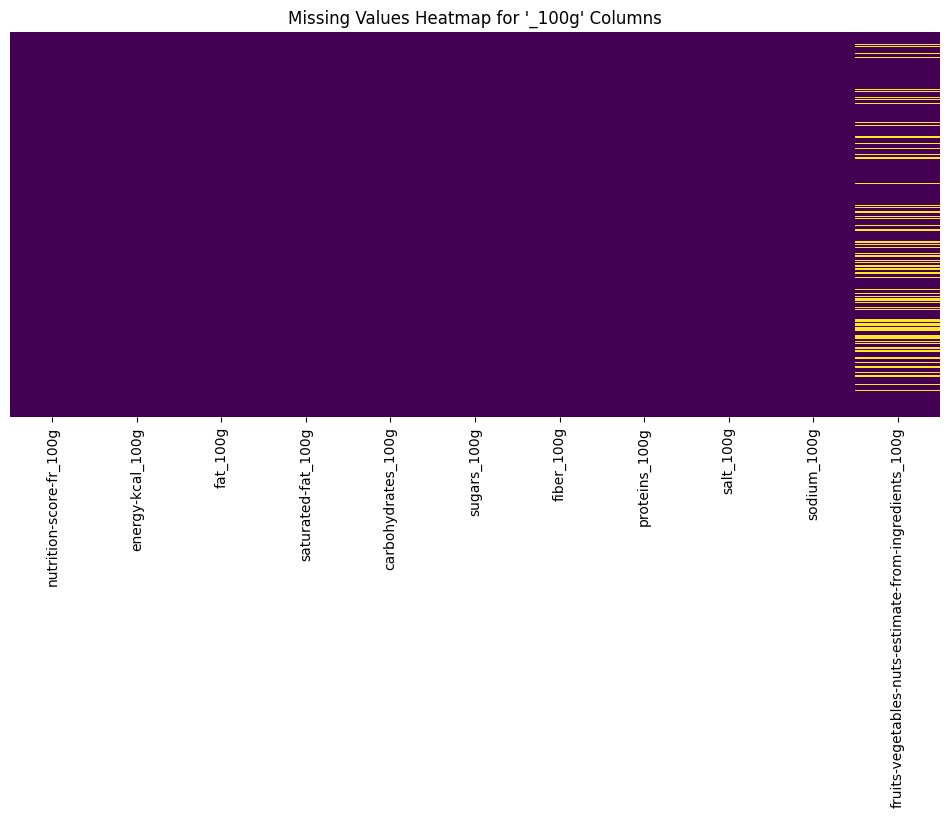

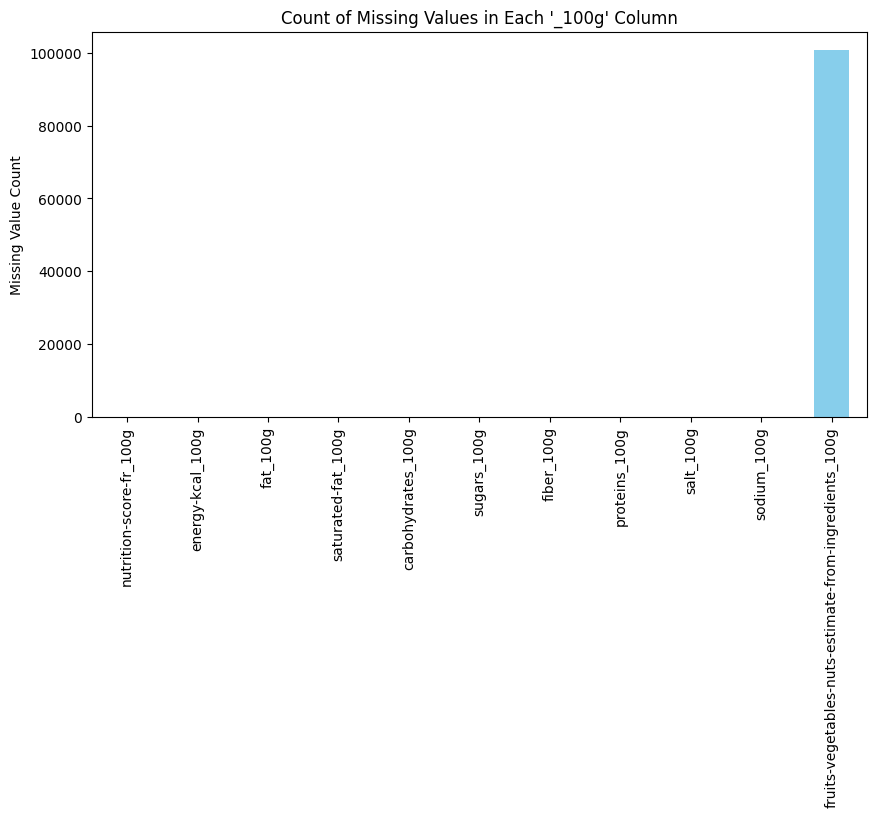

In [8]:
# Missing Values Overview
plt.figure(figsize=(12, 5))

# Heatmap of missing values
sns.heatmap(df_filtered[columns_100g].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap for '_100g' Columns")
plt.show()

# Optional: Bar plot to see the count of missing values in each column
missing_counts = df_filtered[columns_100g].isnull().sum()
missing_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Count of Missing Values in Each '_100g' Column")
plt.ylabel("Missing Value Count")
plt.show()

### Pairplot of Nutrient Composition (_100g Columns)

This pairplot displays scatter plots of pairwise relationships between the selected `_100g` nutrient columns, as well as histograms along the diagonal for individual distributions. This is useful for identifying potential correlations between variables and understanding their distribution patterns.

#### Observations:
- There seems to be a positive correlation between `fat_100g` and `energy-kcal_100g`, which is expected as fat contributes to energy.
- Some nutrients, like `sodium_100g`, have sparse values, suggesting a concentrated range with fewer outliers.
- There is a visible cluster in `nutrition-score-fr_100g`, indicating clear separations in the dataset related to the nutritional score.


### Boxplot of Nutrient Composition per 100g

- **Energy (kcal)** has several outliers above 1000, indicating highly caloric foods that might require a closer look.
- **Fruits-Vegetables-Nuts Estimate** has a wide range and many outliers, suggesting that there are substantial variations in how these ingredients are included in the dataset.
- Other nutrients, such as `proteins_100g` and `carbohydrates_100g`, show fewer outliers but still present moderate variability.


### Correlation Heatmap of Nutrient Composition

- `energy-kcal_100g` has a moderate to strong positive correlation with `fat_100g` and `saturated-fat_100g`, which is expected as these macronutrients contribute to the total energy of food.
- `carbohydrates_100g` and `sugars_100g` also show a moderate positive correlation, indicating that foods higher in carbohydrates are likely to contain more sugars.
- Some columns like `salt_100g` and `sodium_100g` have minimal correlations with other nutrients, implying independence from the rest of the nutrient composition.


### Violin Plots for Nutrient Distributions per 100g

- Many features, like `fat_100g` and `saturated-fat_100g`, have skewed distributions with a concentration toward lower values but a long tail of higher values.
- **Energy (kcal)** shows a wide distribution, with most values concentrated between 0 and 500, but a tail extending to higher caloric content.
- The **nutrition-score-fr_100g** plot shows multiple peaks, indicating that this score is categorized into specific ranges.


## EDA Second Step: Variable-by-Variable Examination

### `nutrition-score-fr_100g` 

This variable reflects the overall nutritional score of a product. We will examine its distribution to check for potential outliers or abnormalities.


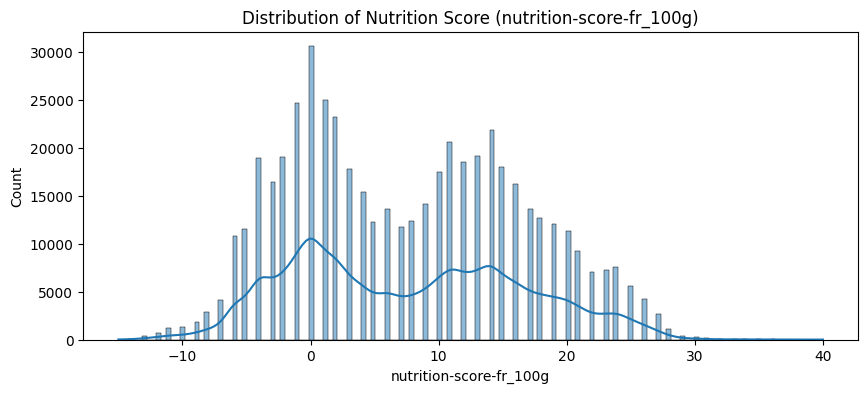

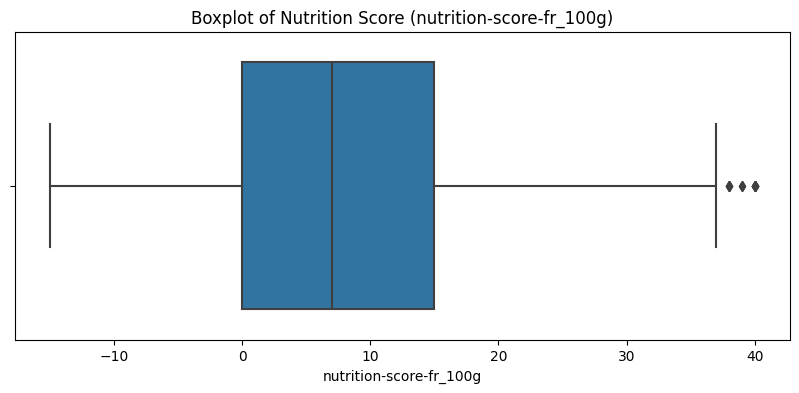

In [9]:
# Distribution and outliers for `nutrition-score-fr_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['nutrition-score-fr_100g'], kde=True)
plt.title('Distribution of Nutrition Score (nutrition-score-fr_100g)')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['nutrition-score-fr_100g'])
plt.title('Boxplot of Nutrition Score (nutrition-score-fr_100g)')
plt.show()


### `energy-kcal_100g` - Detailed EDA

We will visualize the distribution of energy per 100 grams to identify extreme values or outliers, as we observed many high-calorie products in the first overview.


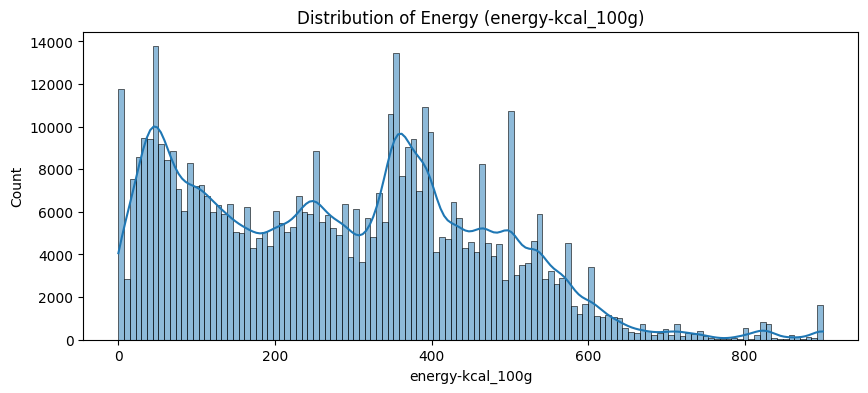

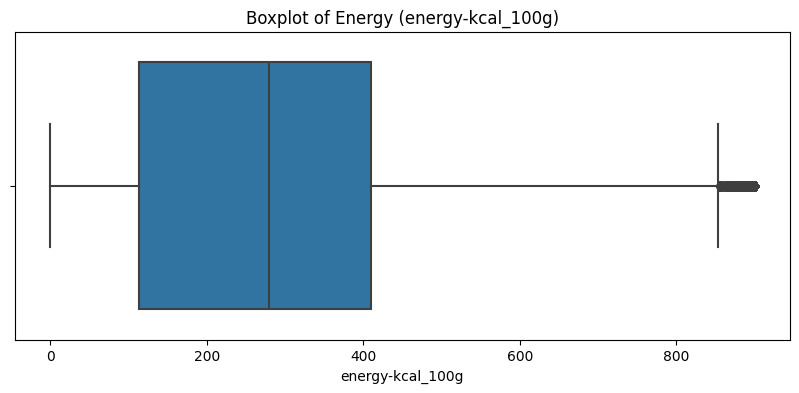

In [10]:
# Distribution and outliers for `energy-kcal_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['energy-kcal_100g'], kde=True)
plt.title('Distribution of Energy (energy-kcal_100g)')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['energy-kcal_100g'])
plt.title('Boxplot of Energy (energy-kcal_100g)')
plt.show()


### `fat_100g` and `saturated-fat_100g` 

Fat and saturated fat tend to be skewed, as seen in the initial EDA. We will closely observe their distributions and outliers.


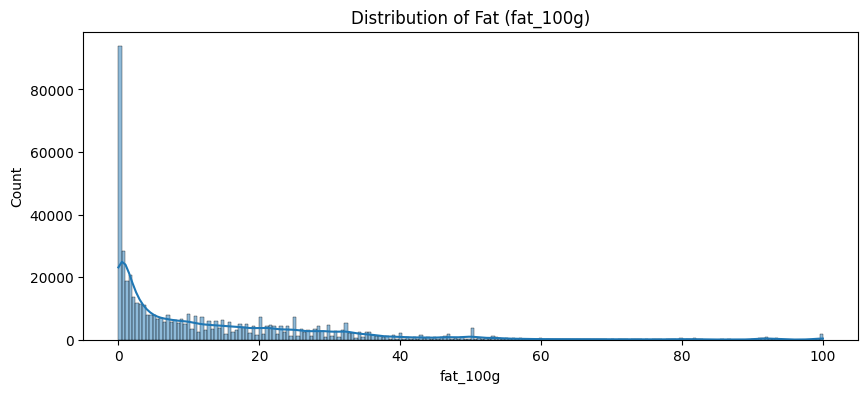

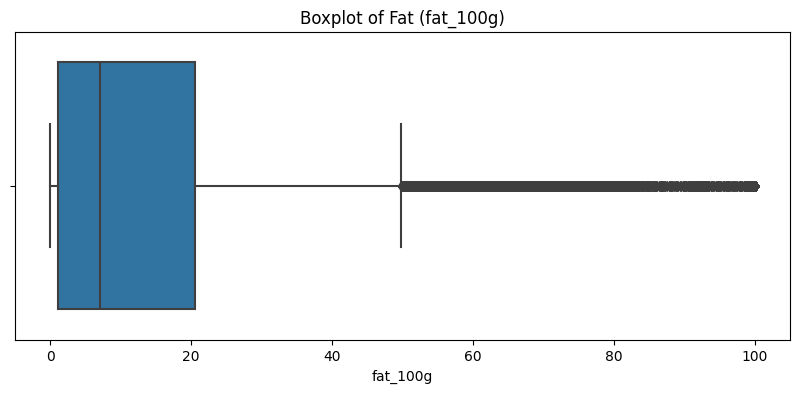

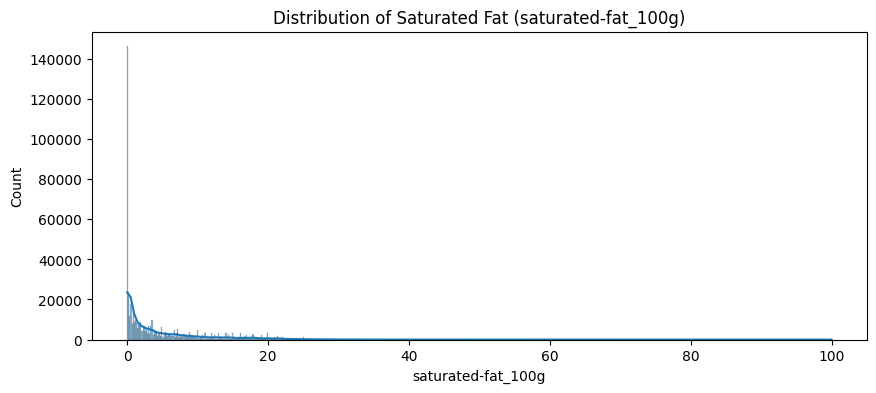

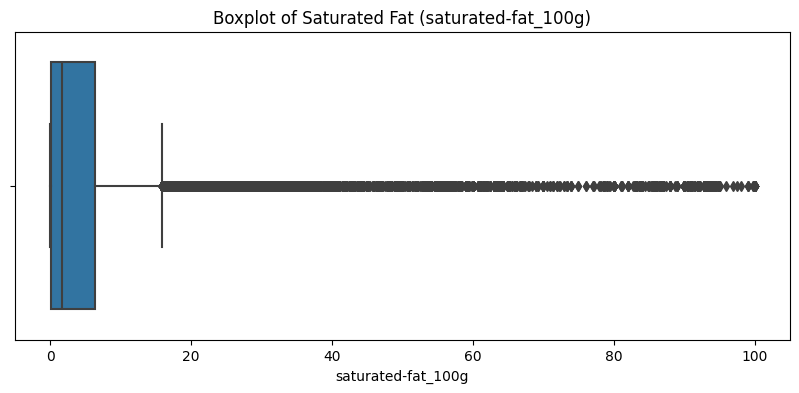

In [11]:
# Distribution and outliers for `fat_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fat_100g'], kde=True)
plt.title('Distribution of Fat (fat_100g)')
plt.show()

# Boxplot for `fat_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fat_100g'])
plt.title('Boxplot of Fat (fat_100g)')
plt.show()

# Distribution and outliers for `saturated-fat_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['saturated-fat_100g'], kde=True)
plt.title('Distribution of Saturated Fat (saturated-fat_100g)')
plt.show()

# Boxplot for `saturated-fat_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['saturated-fat_100g'])
plt.title('Boxplot of Saturated Fat (saturated-fat_100g)')
plt.show()


### `carbohydrates_100g` and `sugars_100g` 

We will examine carbohydrates and sugars, both of which are correlated, to detect skewness and potential outliers.


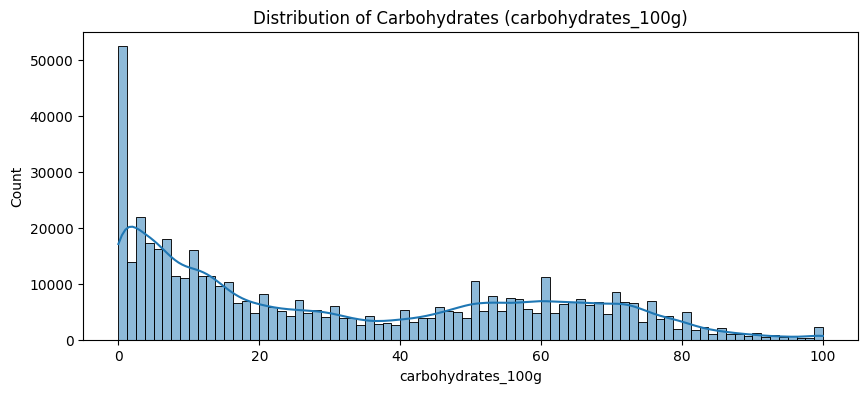

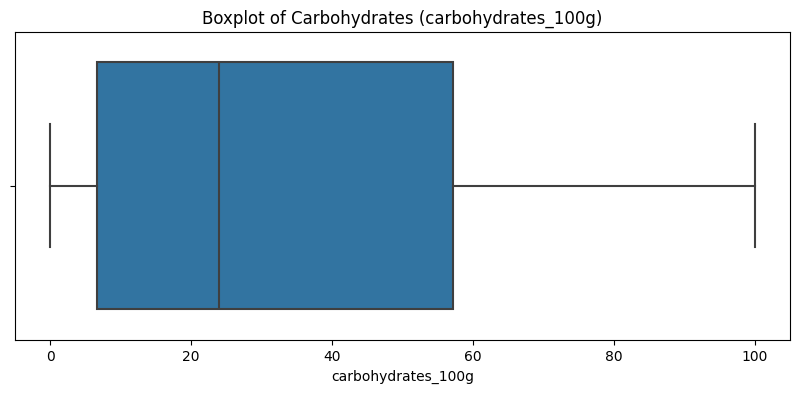

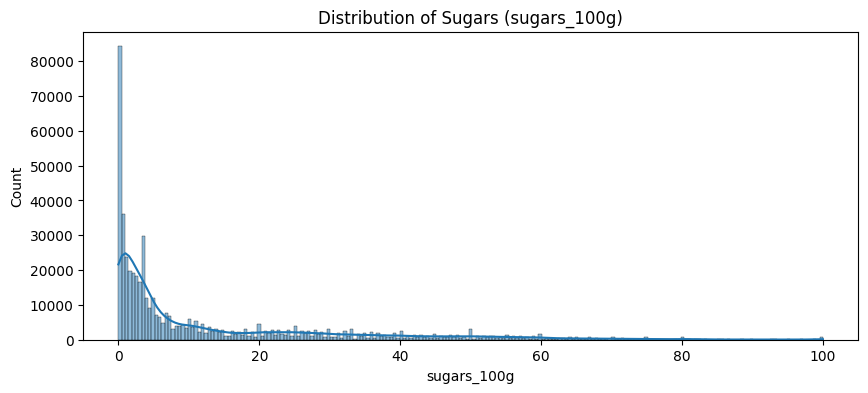

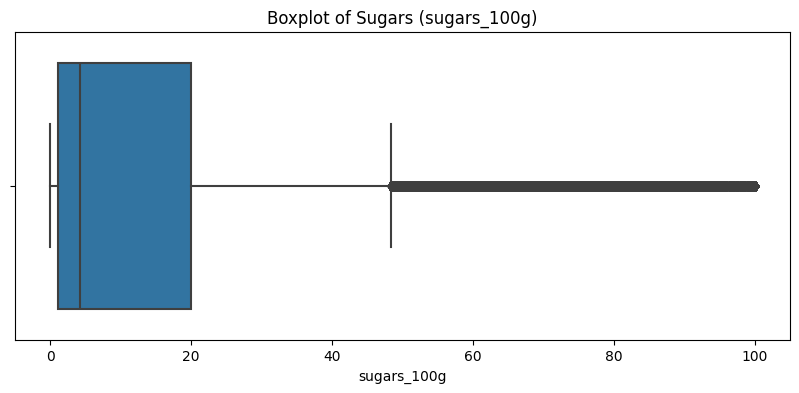

In [12]:
# Distribution and outliers for `carbohydrates_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['carbohydrates_100g'], kde=True)
plt.title('Distribution of Carbohydrates (carbohydrates_100g)')
plt.show()

# Boxplot for `carbohydrates_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['carbohydrates_100g'])
plt.title('Boxplot of Carbohydrates (carbohydrates_100g)')
plt.show()

# Distribution and outliers for `sugars_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['sugars_100g'], kde=True)
plt.title('Distribution of Sugars (sugars_100g)')
plt.show()

# Boxplot for `sugars_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['sugars_100g'])
plt.title('Boxplot of Sugars (sugars_100g)')
plt.show()


### `fiber_100g` - Detailed EDA

Fiber is important for health, and its distribution shows variability. We will check for any outliers or skewness.


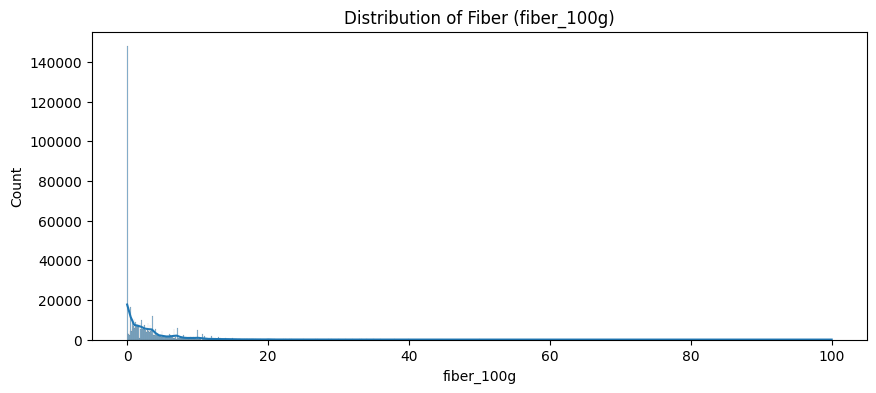

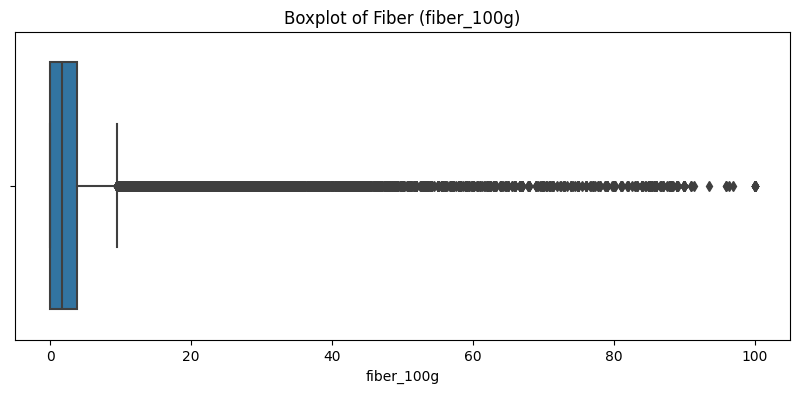

In [13]:
# Distribution and outliers for `fiber_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fiber_100g'], kde=True)
plt.title('Distribution of Fiber (fiber_100g)')
plt.show()

# Boxplot for `fiber_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fiber_100g'])
plt.title('Boxplot of Fiber (fiber_100g)')
plt.show()


### `proteins_100g` - Detailed EDA

Protein is a key macronutrient, and we need to ensure its distribution is reasonable without excessive outliers.


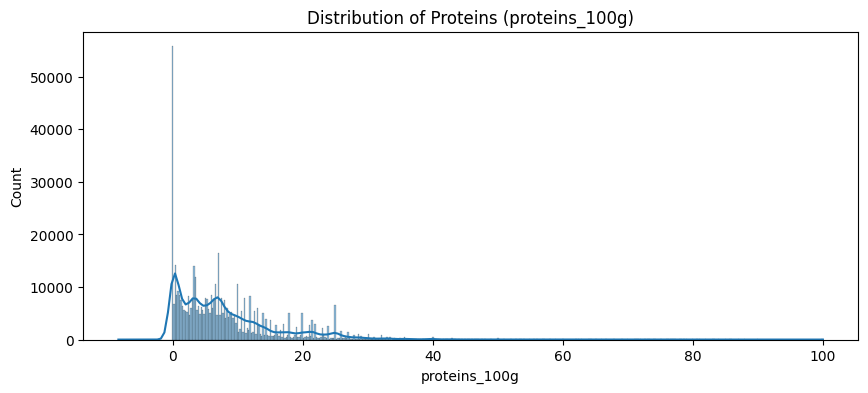

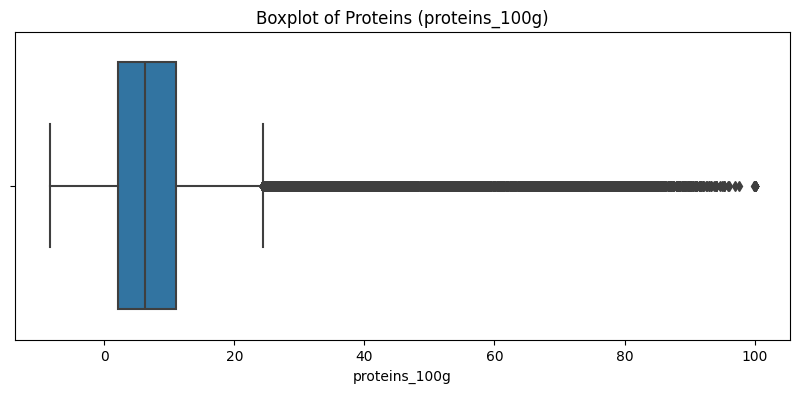

In [14]:
# Distribution and outliers for `proteins_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['proteins_100g'], kde=True)
plt.title('Distribution of Proteins (proteins_100g)')
plt.show()

# Boxplot for `proteins_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['proteins_100g'])
plt.title('Boxplot of Proteins (proteins_100g)')
plt.show()


### `salt_100g` and `sodium_100g`- Detailed EDA

Both salt and sodium are highly skewed, with some outliers. We will examine their distributions and handle any irregularities.


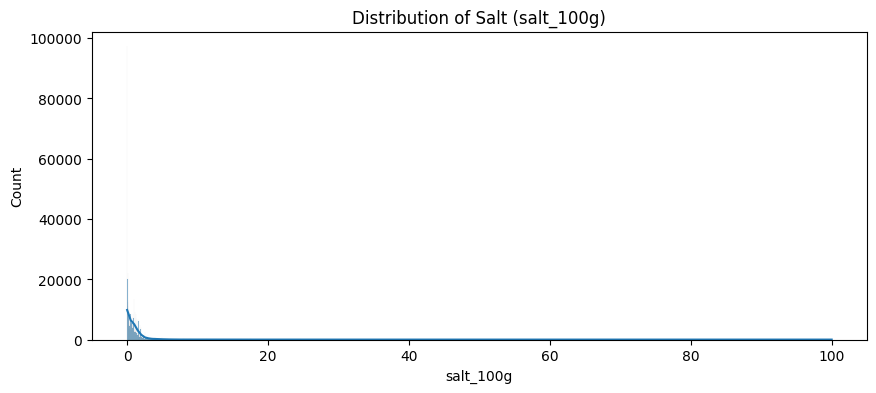

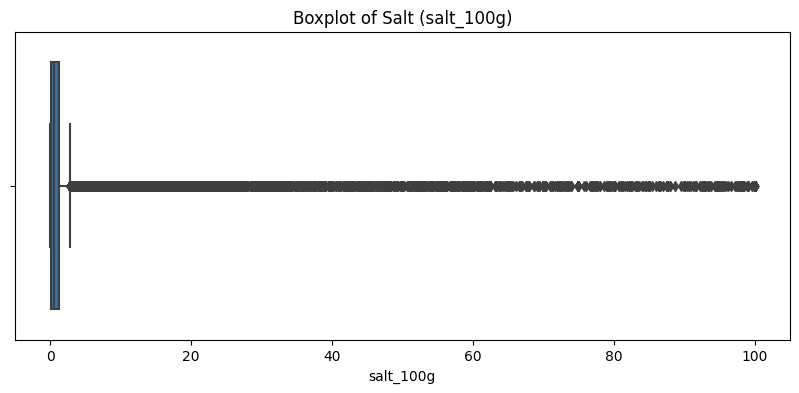

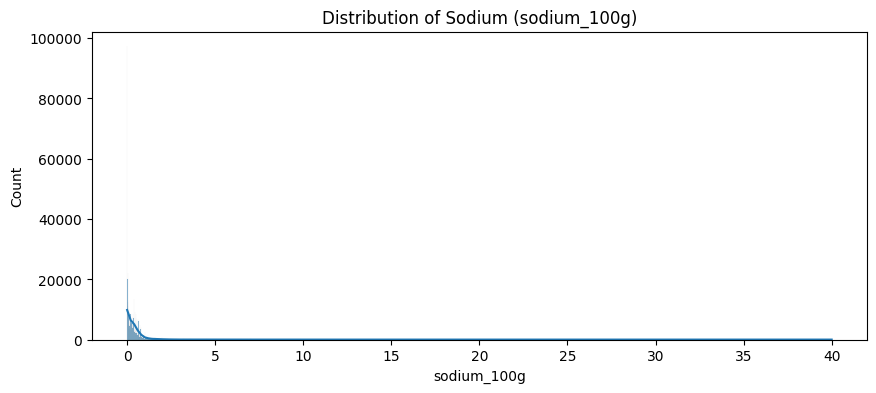

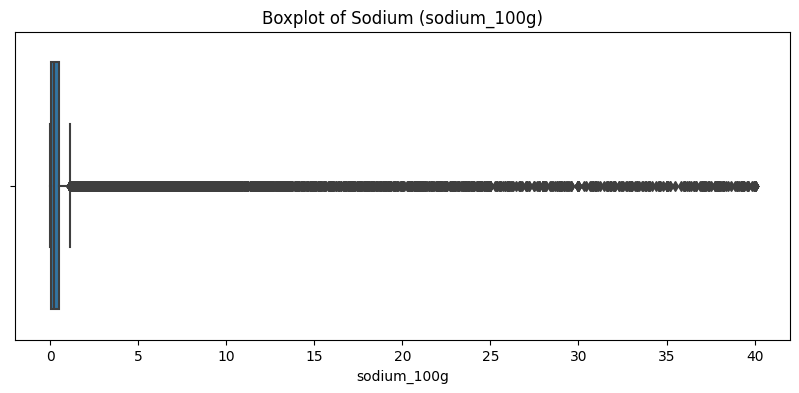

In [15]:
# Distribution and outliers for `salt_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['salt_100g'], kde=True)
plt.title('Distribution of Salt (salt_100g)')
plt.show()

# Boxplot for `salt_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['salt_100g'])
plt.title('Boxplot of Salt (salt_100g)')
plt.show()

# Distribution and outliers for `sodium_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['sodium_100g'], kde=True)
plt.title('Distribution of Sodium (sodium_100g)')
plt.show()

# Boxplot for `sodium_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['sodium_100g'])
plt.title('Boxplot of Sodium (sodium_100g)')
plt.show()


### `fruits-vegetables-nuts-estimate-from-ingredients_100g` 

This variable has a large number of missing values. We will visualize the available data to understand its distribution and decide how to handle the missing values.


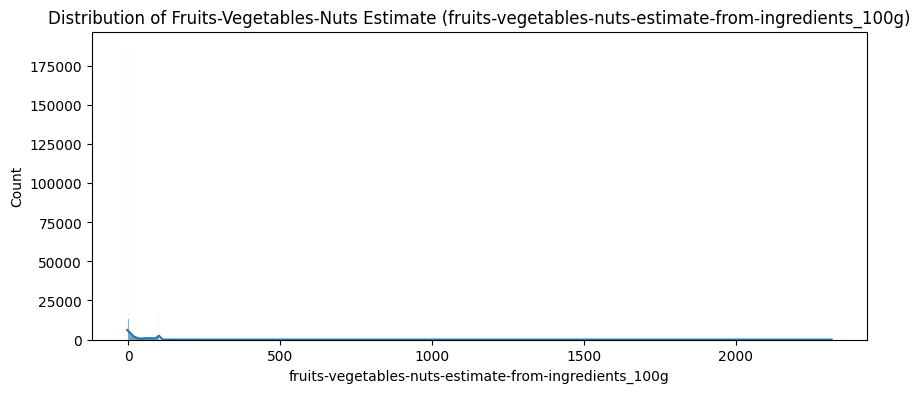

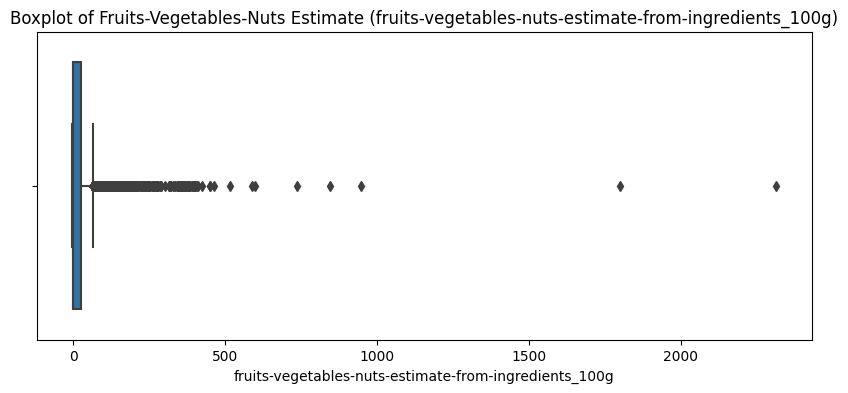

In [16]:
# Distribution and outliers for `fruits-vegetables-nuts-estimate-from-ingredients_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fruits-vegetables-nuts-estimate-from-ingredients_100g'].dropna(), kde=True)
plt.title('Distribution of Fruits-Vegetables-Nuts Estimate (fruits-vegetables-nuts-estimate-from-ingredients_100g)')
plt.show()

# Boxplot for `fruits-vegetables-nuts-estimate-from-ingredients_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fruits-vegetables-nuts-estimate-from-ingredients_100g'].dropna())
plt.title('Boxplot of Fruits-Vegetables-Nuts Estimate (fruits-vegetables-nuts-estimate-from-ingredients_100g)')
plt.show()



## 3-EDA Summary and Preprocessing Plan

### 1. `nutrition-score-fr_100g`

**Observations**:
- The distribution is fairly spread, with several peaks around -5, 0, 10, and 15.
- A few outliers beyond 30, but most data are concentrated between -10 and 20.

**Preprocessing**:
- No major preprocessing is required for this feature. Outliers are minimal and the distribution is acceptable for modeling.

---

### 2. `energy-kcal_100g`

**Observations**:
- The distribution spans a wide range, with peaks between 100 and 400 kcal.
- The data has a long tail with outliers extending up to 900 kcal.

**Preprocessing**:
- **Outlier Treatment**: Cap the extreme values at the 95th percentile (~800 kcal) to reduce the influence of the highest outliers.
- **Log Transformation**: If the distribution remains highly skewed after capping, consider log transformation to further normalize it.

---

### 3. `fat_100g` and `saturated-fat_100g`

**Observations**:
- Both features are highly skewed. Most products have low fat and saturated fat content, but the tail extends to 100g.
- Significant outliers start beyond 40g for fat and 20g for saturated fat.

**Preprocessing**:
- **Log Transformation**: Apply log transformation to reduce skewness and normalize the distribution.
- **Outlier Treatment**: Cap extreme values at the 99th percentile to manage the influence of very high values.

---

### 4. `carbohydrates_100g` and `sugars_100g`

**Observations**:
- Carbohydrates show a somewhat bimodal distribution, with peaks around 10g and 60g.
- Sugars exhibit a steep skew with a long tail extending to 100g.

**Preprocessing**:
- **Outlier Treatment**: Cap extreme values at the 95th percentile for both carbohydrates and sugars.
- **Log Transformation**: Consider log transformation for sugars to reduce skewness.

---

### 5. `fiber_100g`

**Observations**:
- The distribution is skewed, with most products having low fiber content, but there is a long tail extending to 100g.

**Preprocessing**:
- **Outlier Treatment**: Capping outliers at the 95th percentile may be beneficial, but no immediate transformation is needed.
- No log transformation required unless modeling performance is affected.

---

### 6. `proteins_100g`

**Observations**:
- Protein values are skewed, with many products concentrated between 0-20g. Outliers extend beyond 40g.

**Preprocessing**:
- **Outlier Treatment**: Cap extreme values at the 95th percentile.
- **Log Transformation**: Consider log transformation if skewness impacts model performance.

---

### 7. `salt_100g` and `sodium_100g`

**Observations**:
- Both salt and sodium distributions are highly skewed, with most products having low values and some extreme outliers extending to 100g.

**Preprocessing**:
- **Log Transformation**: Apply log transformation to both variables to manage skewness.
- **Outlier Treatment**: Cap extreme values at the 95th percentile to minimize the effect of outliers.

---

### 8. `fruits-vegetables-nuts-estimate-from-ingredients_100g`

**Observations**:
- This feature has a large amount of missing data and shows a high degree of variability.
- There are many outliers, some exceeding 1000g, which is implausible.

**Preprocessing**:
- **Missing Values**: Consider imputing missing values using the mean, median, or a more sophisticated method (like KNN imputation) if this variable is important. Alternatively, this feature can be dropped if it does not contribute to the target variable.
- **Outlier Treatment**: Cap outliers at a reasonable limit (e.g., 95th percentile) or remove implausible values exceeding logical limits.

---

## General Preprocessing Steps

#### 1. Handle Missing Values:
- **Action**: For `fruits-vegetables-nuts-estimate-from-ingredients_100g`, decide whether to impute missing values or drop this feature if it's not essential.

#### 2. Apply Log Transformation:
- **Action**: Apply log transformation to features that exhibit high skewness (`fat_100g`, `saturated-fat_100g`, `salt_100g`, `sodium_100g`).

#### 3. Cap Outliers:
- **Action**: Use capping for extreme outliers based on the 95th or 99th percentile for relevant variables (`energy-kcal_100g`, `fat_100g`, `carbohydrates_100g`, `sugars_100g`, `proteins_100g`).

#### 4. Scaling the Data:
- **Action**: After handling outliers and transformations, apply **scaling** (standardization or normalization) to ensure that all features are on a comparable scale for modeling.


## Data Preprocessing

This section handles preprocessing tasks, including handling missing values, outlier treatment, and normalization.
These steps prepare the data for modeling, ensuring consistent feature scales and managing null entries.

In [25]:
# Create a new DataFrame with only `_100g` columns
columns_100g = [col for col in df_filtered.columns if '_100g' in col]
df_100g = df_filtered[columns_100g].copy()

# Display the initial summary of `df_100g`
print("Initial summary of `df_100g`:")
display(df_100g.describe(include='all'))


Initial summary of `df_100g`:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            517130.000000     517130.000000  517130.000000   
mean                  7.487636        276.695486       1.926328   
std                   8.736213        173.028443       1.281719   
min                  -9.000000          0.000000       0.000000   
25%                   0.000000        114.000000       0.741937   
50%                   7.000000        280.000000       2.096790   
75%                  15.000000        410.000000       3.072230   
max                  23.000000        571.000000       3.843744   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       517130.000000       517130.000000  517130.000000  517130.000000   
mean             1.129466           31.777236      12.488610       2.711259   
std              1.014237           26.692427      16.138409       3.111170   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.095310            6.670000       1.100000       0.000000   
50%              0.993252           24.000000       4.200000       1.700000   
75%              2.001480           57.140000      20.000000       3.800000   
max              2.966303           78.000000      53.600000      10.700000   

       proteins_100g      salt_100g    sodium_100g  \
count  517130.000000  517130.000000  517130.000000   
mean        7.778509       0.486262       0.245760   
std         7.086373       0.425907       0.233540   
min         0.000000       0.000000       0.000000   
25%         2.100000       0.079273       0.032467   
50%         6.200000       0.439867       0.199670   
75%        11.000000       0.788457       0.392042   
max        25.000000       1.381282       0.784814   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      517130.000000      
mean                                           16.733960      
std                                            29.316572      
min                                             0.000000      
25%                                             0.000000      
50%                                             1.500000      
75%                                            16.666667      
max                                            96.000000

Step 2: Handle Missing Values (2 Options)

In [26]:
# Drop `fruits-vegetables-nuts-estimate-from-ingredients_100g` if it has more than 50% missing values
if 'fruits-vegetables-nuts-estimate-from-ingredients_100g' in df_100g.columns:
    missing_percent = df_100g['fruits-vegetables-nuts-estimate-from-ingredients_100g'].isnull().mean() * 100
    if missing_percent > 50:
        df_100g = df_100g.drop(columns=['fruits-vegetables-nuts-estimate-from-ingredients_100g'])
        print("Dropped `fruits-vegetables-nuts-estimate-from-ingredients_100g` due to excessive missing values.")
    else:
        print("Column retained for imputation.")


Column retained for imputation.


In [27]:
from sklearn.impute import SimpleImputer

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df_100g = pd.DataFrame(imputer.fit_transform(df_100g), columns=df_100g.columns)

# Display summary after missing value handling
print("Summary after handling missing values:")
display(df_100g.describe())


Summary after handling missing values:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            517130.000000     517130.000000  517130.000000   
mean                  7.487636        276.695486       1.926328   
std                   8.736213        173.028443       1.281719   
min                  -9.000000          0.000000       0.000000   
25%                   0.000000        114.000000       0.741937   
50%                   7.000000        280.000000       2.096790   
75%                  15.000000        410.000000       3.072230   
max                  23.000000        571.000000       3.843744   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       517130.000000       517130.000000  517130.000000  517130.000000   
mean             1.129466           31.777236      12.488610       2.711259   
std              1.014237           26.692427      16.138409       3.111170   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.095310            6.670000       1.100000       0.000000   
50%              0.993252           24.000000       4.200000       1.700000   
75%              2.001480           57.140000      20.000000       3.800000   
max              2.966303           78.000000      53.600000      10.700000   

       proteins_100g      salt_100g    sodium_100g  \
count  517130.000000  517130.000000  517130.000000   
mean        7.778509       0.486262       0.245760   
std         7.086373       0.425907       0.233540   
min         0.000000       0.000000       0.000000   
25%         2.100000       0.079273       0.032467   
50%         6.200000       0.439867       0.199670   
75%        11.000000       0.788457       0.392042   
max        25.000000       1.381282       0.784814   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      517130.000000      
mean                                           16.733960      
std                                            29.316572      
min                                             0.000000      
25%                                             0.000000      
50%                                             1.500000      
75%                                            16.666667      
max                                            96.000000

Step 3: Outlier Treatment (Multiple Options)

Option 1: Cap Outliers at the 95th Percentile


In [28]:
# Define a function to cap outliers at the given percentiles
def cap_outliers(df, column, lower_percentile=1, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

# Apply outlier capping for each `_100g` column
for col in df_100g.columns:
    df_100g = cap_outliers(df_100g, col, 1, 95)

# Display summary after outlier capping
print("Summary after capping outliers:")
display(df_100g.describe())


Summary after capping outliers:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            517130.000000     517130.000000  517130.000000   
mean                  7.487636        276.695486       1.926328   
std                   8.736213        173.028443       1.281719   
min                  -9.000000          0.000000       0.000000   
25%                   0.000000        114.000000       0.741937   
50%                   7.000000        280.000000       2.096790   
75%                  15.000000        410.000000       3.072230   
max                  23.000000        571.000000       3.843744   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       517130.000000       517130.000000  517130.000000  517130.000000   
mean             1.129466           31.777236      12.488610       2.711259   
std              1.014237           26.692427      16.138409       3.111170   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.095310            6.670000       1.100000       0.000000   
50%              0.993252           24.000000       4.200000       1.700000   
75%              2.001480           57.140000      20.000000       3.800000   
max              2.966303           78.000000      53.600000      10.700000   

       proteins_100g      salt_100g    sodium_100g  \
count  517130.000000  517130.000000  517130.000000   
mean        7.778509       0.486262       0.245760   
std         7.086373       0.425907       0.233540   
min         0.000000       0.000000       0.000000   
25%         2.100000       0.079273       0.032467   
50%         6.200000       0.439867       0.199670   
75%        11.000000       0.788457       0.392042   
max        25.000000       1.381282       0.784814   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      517130.000000      
mean                                           16.733960      
std                                            29.316572      
min                                             0.000000      
25%                                             0.000000      
50%                                             1.500000      
75%                                            16.666667      
max                                            96.000000

Option 2: Remove Outliers Using IQR Method

In [29]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR outlier removal for each column in `_100g`
for col in df_100g.columns:
    df_100g = remove_outliers_iqr(df_100g, col)

# Display summary after IQR outlier removal
print("Summary after IQR outlier removal:")
display(df_100g.describe())


Summary after IQR outlier removal:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            355313.000000     355313.000000  355313.000000   
mean                  7.906533        266.007830       1.968430   
std                   8.376263        166.258656       1.187408   
min                  -9.000000          0.000000       0.000000   
25%                   0.000000        115.000000       0.993252   
50%                   8.000000        258.000000       2.149434   
75%                  15.000000        397.000000       2.995732   
max                  23.000000        571.000000       3.843744   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       355313.000000       355313.000000  355313.000000  355313.000000   
mean             1.158528           31.565726       9.877246       2.097319   
std              0.975588           26.509879      12.633199       2.332114   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.182322            6.400000       0.900000       0.000000   
50%              1.029619           24.710000       3.570000       1.400000   
75%              1.974081           56.670000      15.000000       3.330000   
max              2.966303           78.000000      48.333333       9.750000   

       proteins_100g      salt_100g    sodium_100g  \
count  355313.000000  355313.000000  355313.000000   
mean        7.265485       0.522891       0.264343   
std         5.755073       0.419930       0.230991   
min         0.000000       0.000000       0.000000   
25%         3.000000       0.113329       0.046884   
50%         6.500000       0.512824       0.237441   
75%        10.400000       0.832909       0.418710   
max        24.300000       1.381282       0.784814   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      355313.000000      
mean                                            4.829061      
std                                             8.856610      
min                                             0.000000      
25%                                             0.000000      
50%                                             1.500000      
75%                                             4.035541      
max                                            44.166667

 Log Transformation for Skewed Data

In [30]:
# Apply log transformation to specific skewed columns
skewed_columns = ['fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g']
for col in skewed_columns:
    if col in df_100g.columns:
        df_100g[col] = np.log1p(df_100g[col])  # log(1 + x) to avoid log(0)

# Display summary after log transformation
print("Summary after log transformation:")
display(df_100g.describe())


Summary after log transformation:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            355313.000000     355313.000000  355313.000000   
mean                  7.906533        266.007830       0.983779   
std                   8.376263        166.258656       0.491641   
min                  -9.000000          0.000000       0.000000   
25%                   0.000000        115.000000       0.689767   
50%                   8.000000        258.000000       1.147223   
75%                  15.000000        397.000000       1.385227   
max                  23.000000        571.000000       1.577688   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       355313.000000       355313.000000  355313.000000  355313.000000   
mean             0.660008           31.565726       9.877246       2.097319   
std              0.477224           26.509879      12.633199       2.332114   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.167480            6.400000       0.900000       0.000000   
50%              0.707848           24.710000       3.570000       1.400000   
75%              1.089935           56.670000      15.000000       3.330000   
max              1.377835           78.000000      48.333333       9.750000   

       proteins_100g      salt_100g    sodium_100g  \
count  355313.000000  355313.000000  355313.000000   
mean        7.265485       0.382667       0.218597   
std         5.755073       0.275822       0.176824   
min         0.000000       0.000000       0.000000   
25%         3.000000       0.107354       0.045818   
50%         6.500000       0.413978       0.213045   
75%        10.400000       0.605904       0.349748   
max        24.300000       0.867639       0.579314   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      355313.000000      
mean                                            4.829061      
std                                             8.856610      
min                                             0.000000      
25%                                             0.000000      
50%                                             1.500000      
75%                                             4.035541      
max                                            44.166667

Display Final df_100g and Option to Merge Back

In [31]:
# Final Check: Display the first few rows of the preprocessed `df_100g`
print("Final version of the preprocessed `df_100g`:")
display(df_100g.head())

# Merge back with `df_filtered` if needed
# Uncomment the following line if you wish to combine the preprocessed `df_100g` with the rest of the dataset
# df_filtered.update(df_100g)


Final version of the preprocessed `df_100g`:


nutrition-score-fr_100g  energy-kcal_100g  fat_100g  saturated-fat_100g  \
0                     19.0             571.0  1.555042            1.377835   
2                     17.0              85.0  0.799206            0.554998   
4                     13.0             442.0  1.419607            0.824585   
5                     17.0             460.0  1.439569            1.080418   
6                     16.0             467.0  1.448822            1.085221   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                40.7         35.0         8.4            7.5   0.000000   
2                 9.6          2.2         1.3            5.7   0.576518   
4                54.0         25.0         1.4            6.4   0.354360   
5                54.0         31.0         1.4            6.4   0.330772   
6                53.0         29.0         2.5            6.3   0.315951   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  
0     0.000000                                          12.000000      
2     0.327087                                           0.000000      
4     0.175861                                          22.666667      
5     0.161806                                          16.250000      
6     0.153163                                          16.250000

In [32]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ** Step 1: Prepare `_100g` Columns and Add Target Variable `nutriscore_grade` **
# Create a new DataFrame with only `_100g` columns
columns_100g = [col for col in df_filtered.columns if '_100g' in col]
df_100g = df_filtered[columns_100g].copy()

# Add the target variable `nutriscore_grade`
df_100g['nutriscore_grade'] = df_filtered['nutriscore_grade']

# ** Step 2: Handle Missing Values and Outliers in `_100g` Columns **
# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_100g[columns_100g] = imputer.fit_transform(df_100g[columns_100g])

# Cap outliers in each `_100g` column at the 95th percentile
def cap_outliers(df, column, lower_percentile=1, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

for col in columns_100g:
    df_100g = cap_outliers(df_100g, col, 1, 95)

# ** Step 3: Split Data into Features (X) and Target (y) **
X = df_100g.drop(columns=['nutriscore_grade'])
y = df_100g['nutriscore_grade']

# ** Step 4: Standardize the Features **
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ** Step 5: Train Logistic Regression Model **
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# ** Step 6: Make Predictions and Evaluate the Model **
y_pred = logreg.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           a       0.99      0.99      0.99     34115
           b       0.99      0.98      0.98     23158
           c       0.96      0.95      0.95     33298
           d       0.92      0.93      0.93     40795
           e       0.94      0.93      0.93     23773

    accuracy                           0.96    155139
   macro avg       0.96      0.96      0.96    155139
weighted avg       0.96      0.96      0.96    155139


Confusion Matrix:
[[33882   227     3     3     0]
 [  350 22803     5     0     0]
 [    0   118 31603  1577     0]
 [    0     0  1283 38023  1489]
 [    0     0     2  1644 22127]]
